# Data Cleansing

### Data Cleansing Report

#### Importing Packages and Data Loading

- Imported necessary Python packages for data manipulation and visualization, including pandas, pathlib, and matplotlib.
- Loaded the Telco customer churn dataset from a CSV file into a pandas DataFrame named `telco_df`.

#### Data Inspection and Initial Cleaning

- **Dataset Shape and Columns**: Checked the shape of the dataset and displayed the column names to understand the structure of the data.
  
- **Column Removal**: Removed the 'customerID' column from the dataset as it was deemed unnecessary for the machine learning models.
  
- **Column Renaming**: Renamed the columns for better readability and consistency in naming conventions.

#### Data Type and Missing Value Handling

- **Data Types**: Checked the data types of the columns and identified 'Total Charges' as having an incorrect data type.
  
- **Missing Values**: Checked for missing values in the dataset and found no missing values in the 'Total Charges' column.
  
- **Data Conversion**: Converted the 'Total Charges' column to numeric and 'senior_citizen' from integer to object with 'Yes' and 'No' categories.

#### Data Cleaning and Transformation

- **Handling NaN Values**: Dropped rows with NaN values in the 'total_charges' column.
  
- **Duplicate Removal**: Removed duplicate records from the dataset.

#### Data Exploration

- **Target Class Distribution**: Examined the distribution of the target variable 'churn' to understand the imbalance in the dataset.
  
- **Visualizing Churn Percentage**: Plotted a bar chart to visualize the percentage of churn and non-churn customers in the dataset.
  
- **Pairplot and Histograms**: Created a pairplot to visualize pairwise relationships between numerical features and a histogram to visualize the distribution of numerical features.

- **Countplots for Categorical Features**: Plotted countplots for categorical features to observe the distribution of churn and non-churn customers across different categories.

#### Data Export

- **Saving the Cleaned Data**: Saved the cleaned and transformed dataset as a new CSV file named 'churn_data.csv'.

### Conclusion

The data cleansing process involved several steps to ensure that the Telco customer churn dataset is cleaned, transformed, and ready for machine learning model development:

- Unnecessary columns were removed.
- Columns were renamed for better reference.
- Data types were corrected, and missing values were handled appropriately.
- Duplicates were removed to maintain the integrity of the dataset.
- The distribution of the target variable and the relationships between features were visualized to gain insights into the data.



## Importing Packages

In [51]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Read the CSV data file

In [52]:
file_path = Path('telco_customer_churn.csv')
telco_df = pd.read_csv(file_path)
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Inspecting and Cleansing the Data

In [53]:
# Shape of the dataset
telco_df.shape

(7043, 21)

In [54]:
# column names
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Removing following collumns since it does not add any new information for the machine learning models to learn from
or it is linearly dependent with other features

In [55]:
# Removing unwanted columns
telco_df.drop(['customerID'], axis=1, inplace=True)
telco_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Renaming columns for better reference

In [56]:
# Rename columns
telco_df.rename(columns={
    'gender' : 'gender',
    'SeniorCitizen' : 'senior_citizen',
    'Partner' : 'partner',
    'Dependents' : 'dependents',
    'tenure' : 'tenure',
    'PhoneService' : 'phone_service',
    'MultipleLines' : 'multiple_lines',
    'InternetService' : 'internet_service',
    'OnlineSecurity' : 'online_security',
    'OnlineBackup' : 'online_backup',
    'DeviceProtection' : 'device_protection',
    'TechSupport' : 'tech_support',
    'StreamingTV' : 'streaming_tv',
    'StreamingMovies' : 'streaming_movies',
    'Contract' : 'contract',
    'PaperlessBilling' : 'paperless_billing',
    'PaymentMethod' : 'payment_method',
    'MonthlyCharges' : 'monthly_charges',
    'TotalCharges' : 'total_charges',
    'Churn' : 'churn'
}, inplace=True)

In [57]:
# Target class distribution
telco_df['churn'].value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

In [58]:
telco_df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [59]:
# Data types
telco_df.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
churn                 object
dtype: object

"Total Charges" data type is incorrect which should be numeric. So further analysing needs

In [60]:
print(telco_df['senior_citizen'].isna().sum())


0


In [61]:
# Convert 'Total Charges' to numeric
telco_df['total_charges'] = pd.to_numeric(telco_df['total_charges'], errors='coerce')
telco_df.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [62]:
# Convert 'senior_citizen' from int to object with 'Yes' and 'No'
telco_df['senior_citizen'] = telco_df['senior_citizen'].map({1: 'Yes', 0: 'No'})
telco_df.dtypes



gender                object
senior_citizen        object
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [65]:
# Display the first 20 rows of telco_df
telco_df.head(100)


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Female,No,No,No,12,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,Male,No,Yes,Yes,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.70,No
97,Male,No,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,Male,No,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.20,No


In [66]:
# checking empty values
telco_df.apply(lambda _x: _x == ' ').sum()

gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

'Total Charges' column has 0 empty values

In [67]:
# Checking null values
telco_df.isna().sum()

gender                0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
multiple_lines        0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

In [68]:
# Drop rows with NaN values
telco_df.dropna(subset=['total_charges'], inplace=True)
telco_df.isna().sum()

gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [69]:
# Checking the data type again for total_charges
telco_df['total_charges'].dtype

dtype('float64')

In [70]:
# Checking negative values for all the numeric features
telco_df.apply(lambda _x: _x.dtype == float and _x < 0).sum()

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Length: 7032, dtype: int32

In [71]:
# Dropping duplicate records
telco_df.drop_duplicates(inplace=True)

In [72]:
# Checking a sample of the data
telco_df.sample(5)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
797,Female,No,Yes,Yes,20,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.55,507.40,No
6873,Female,No,Yes,Yes,68,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),89.05,6185.80,No
4592,Female,No,Yes,Yes,39,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,24.20,914.60,No
1403,Male,No,No,No,8,Yes,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,66.25,546.45,No
3917,Male,Yes,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,69.10,69.10,Yes


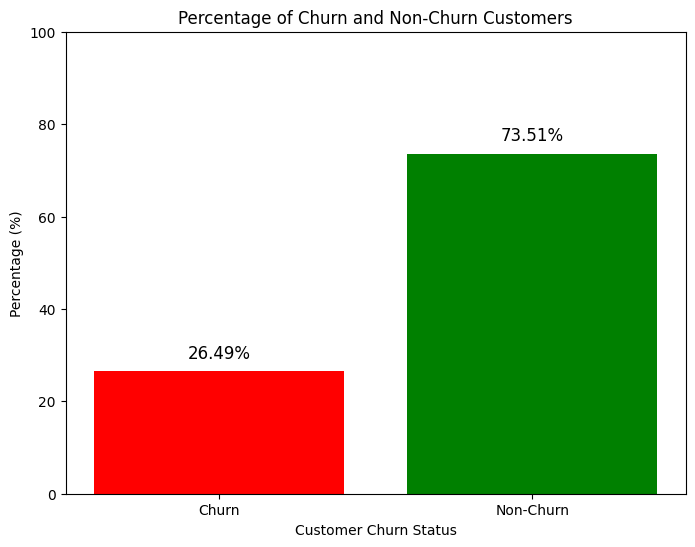

In [74]:
import matplotlib.pyplot as plt

# Calculate the frequency of churn and non-churn customers
churn_count = telco_df['churn'].value_counts()
total_count = len(telco_df)

# Calculate percentages
churn_percentage = (churn_count[1] / total_count) * 100
non_churn_percentage = (churn_count[0] / total_count) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Churn', 'Non-Churn'], [churn_percentage, non_churn_percentage], color=['red', 'green'])
plt.xlabel('Customer Churn Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Churn and Non-Churn Customers')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100

# Display the percentages on the bars
for i, v in enumerate([churn_percentage, non_churn_percentage]):
    plt.text(i, v + 2, f"{v:.2f}%", ha='center', va='bottom', fontsize=12)

plt.show()


Pairplot can visualize pairwise relationships between numerical features and the target variable.

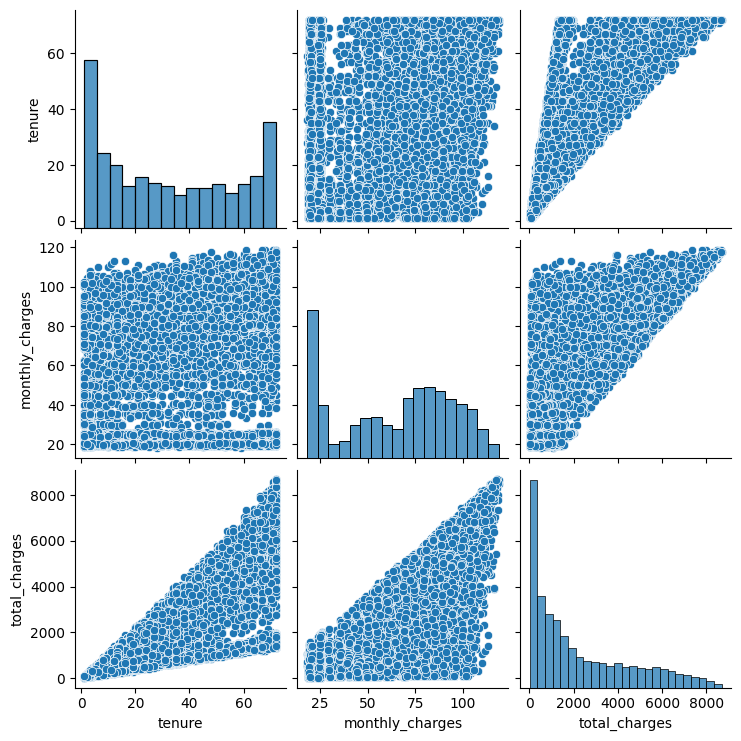

In [75]:
import seaborn as sns
# Select numerical features
numerical_cols = telco_df.select_dtypes(include=['float64', 'int64']).columns

# Create pairplot
sns.pairplot(telco_df[numerical_cols])
plt.show()


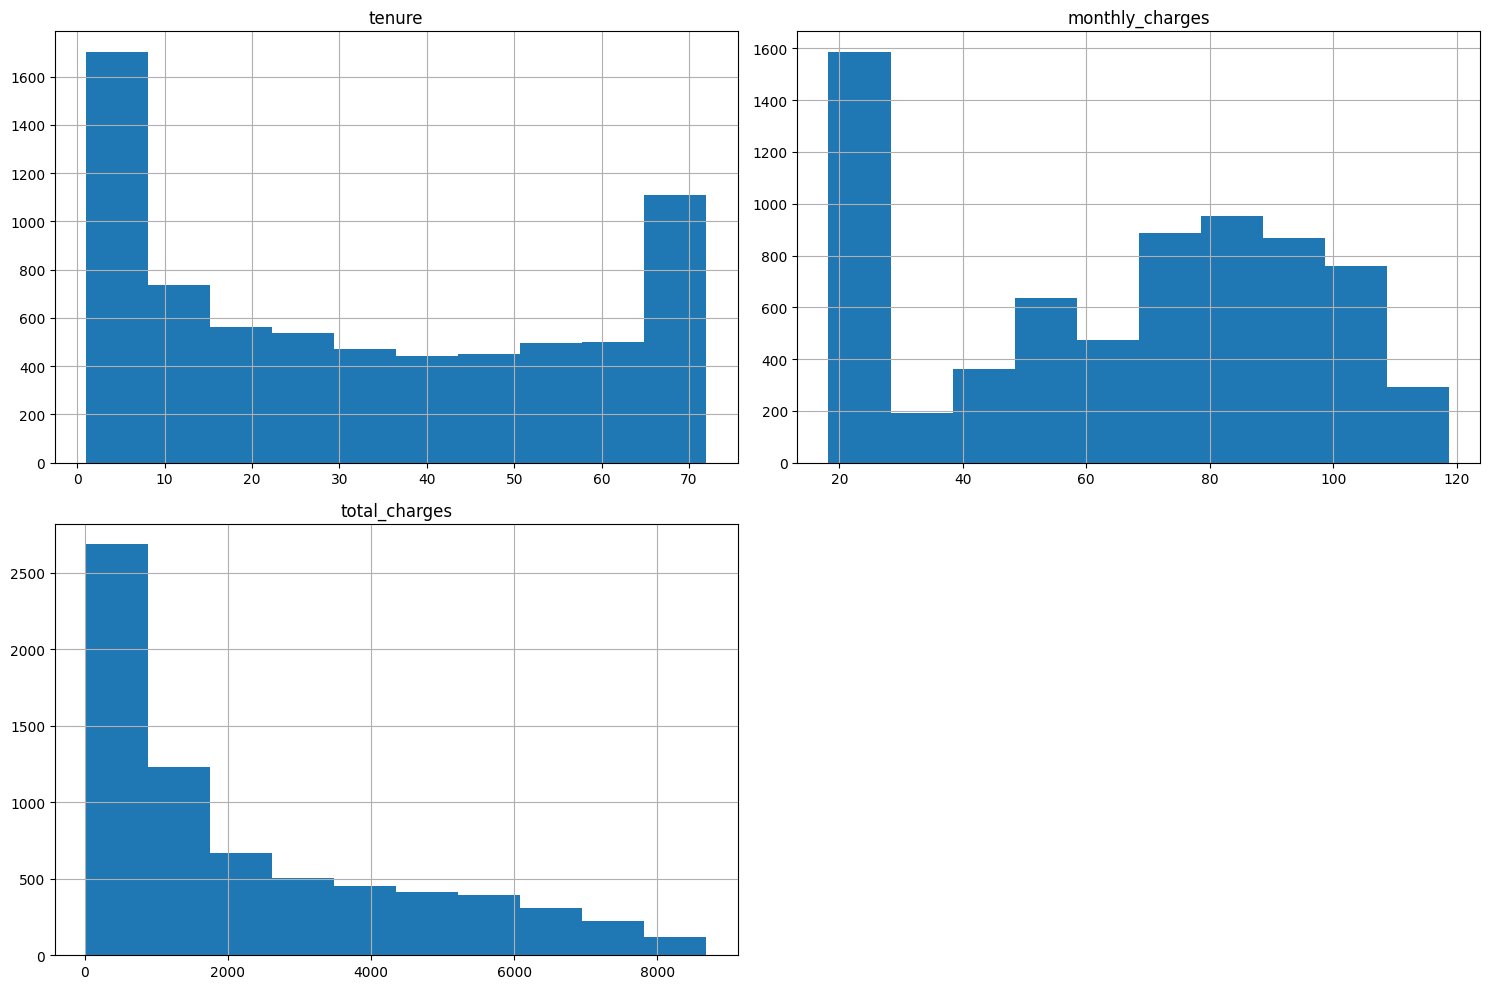

In [76]:
# Plot histograms for numerical features
telco_df[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


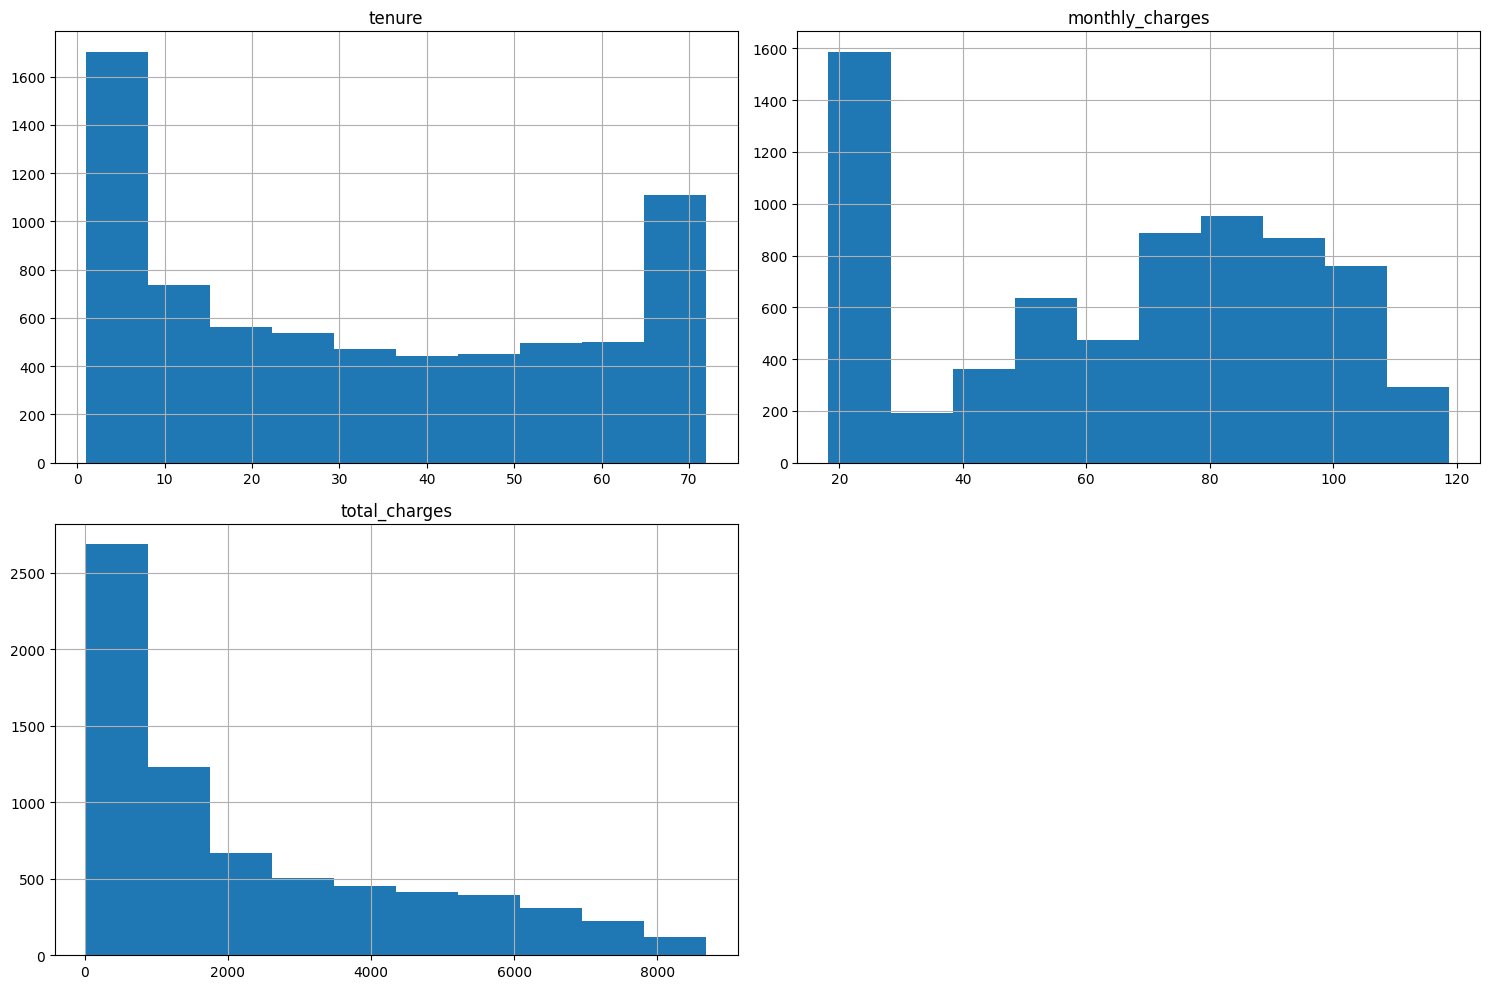

In [77]:
# Plot histograms for numerical features
telco_df[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


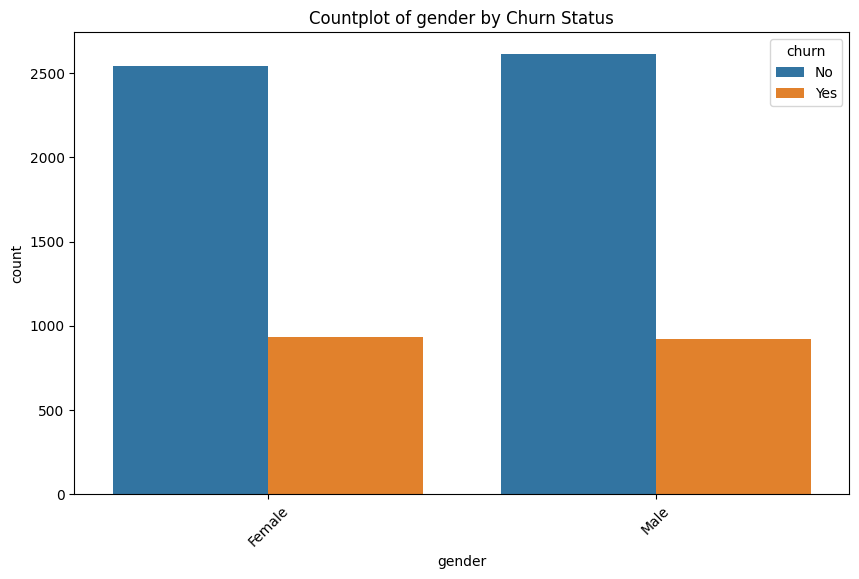

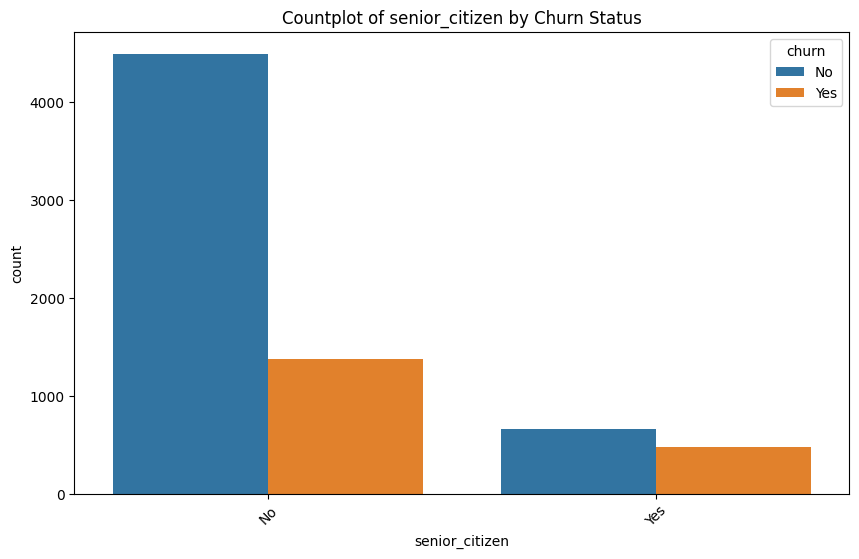

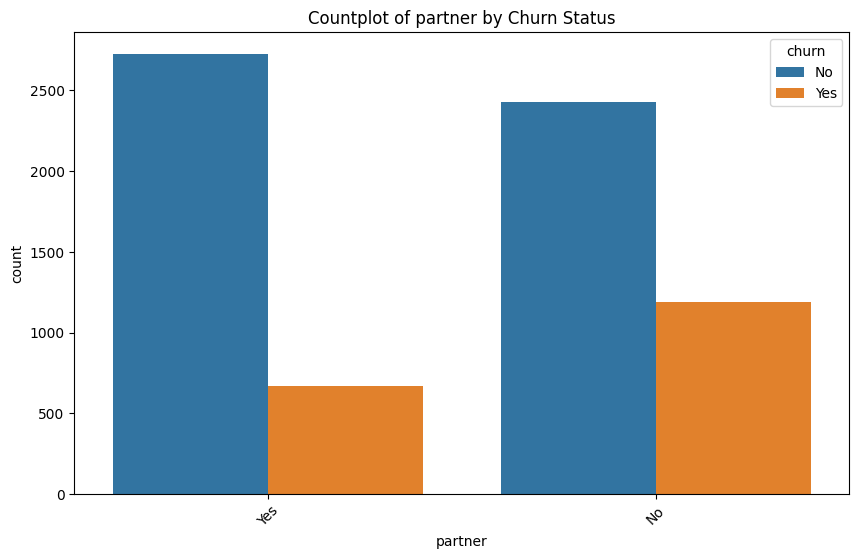

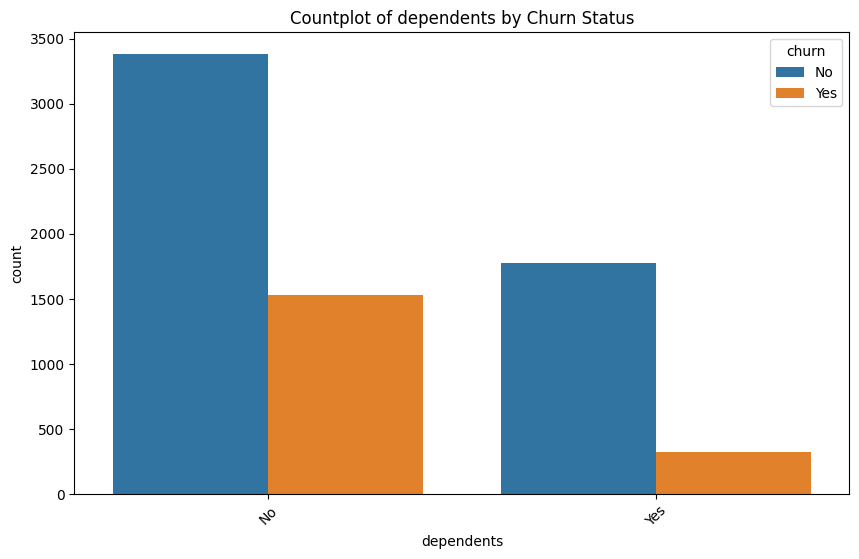

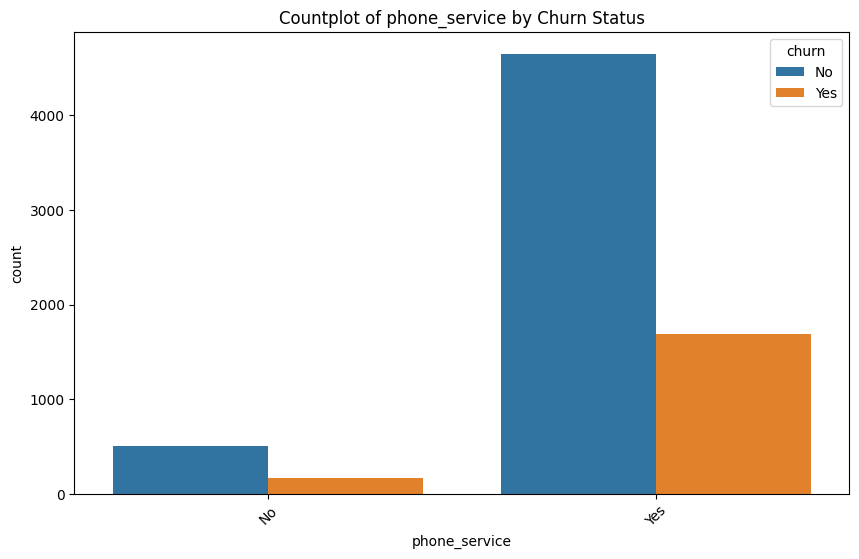

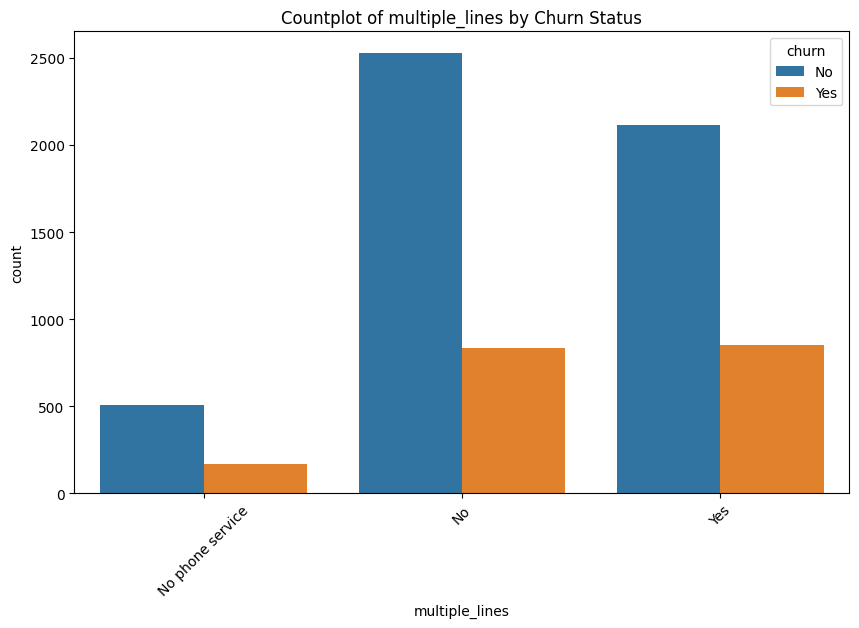

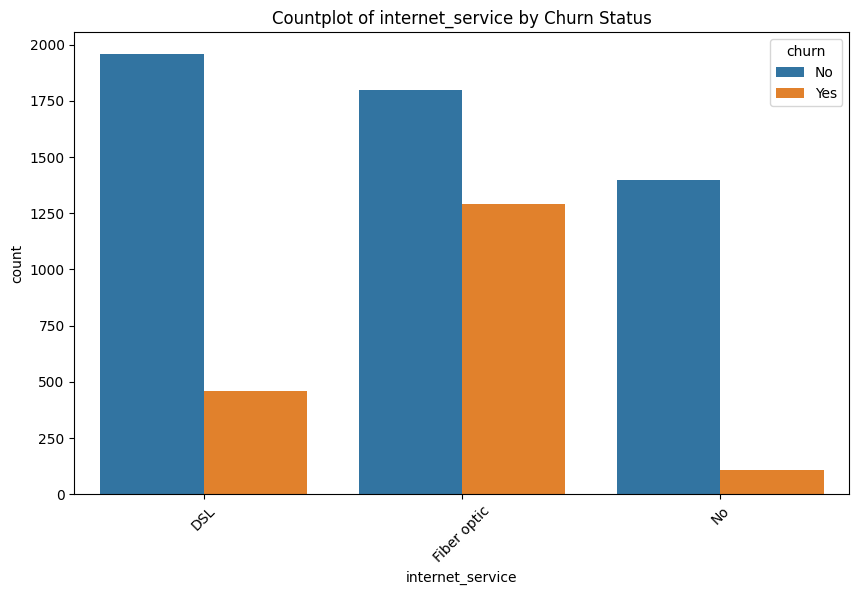

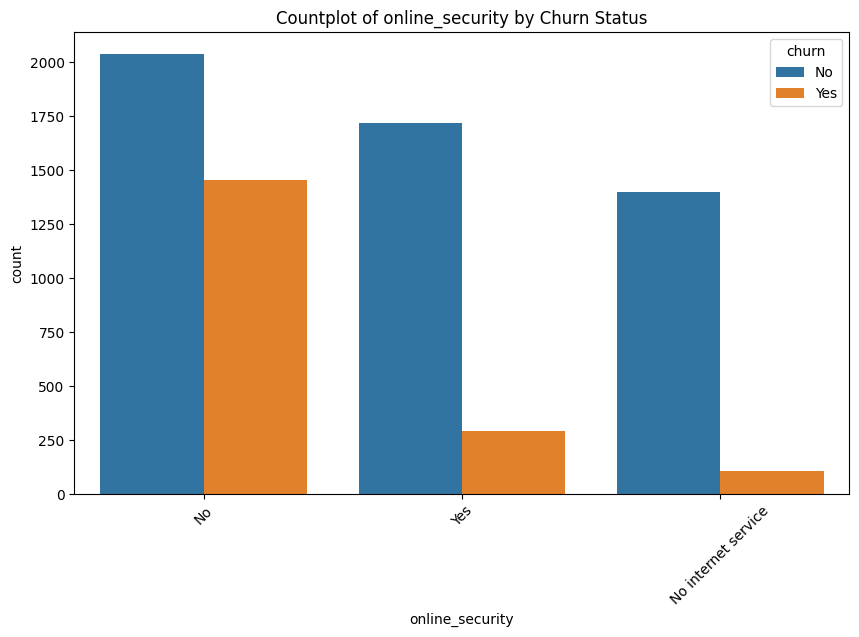

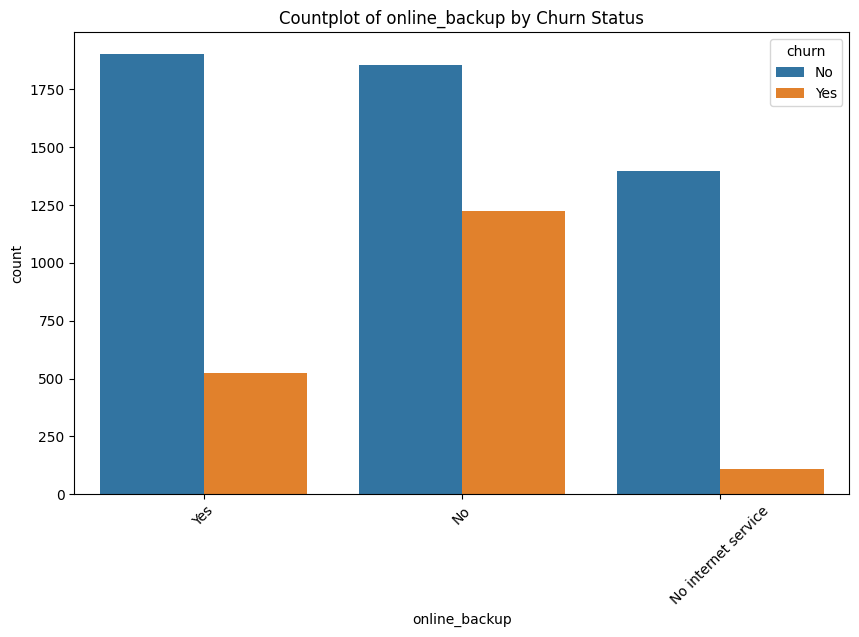

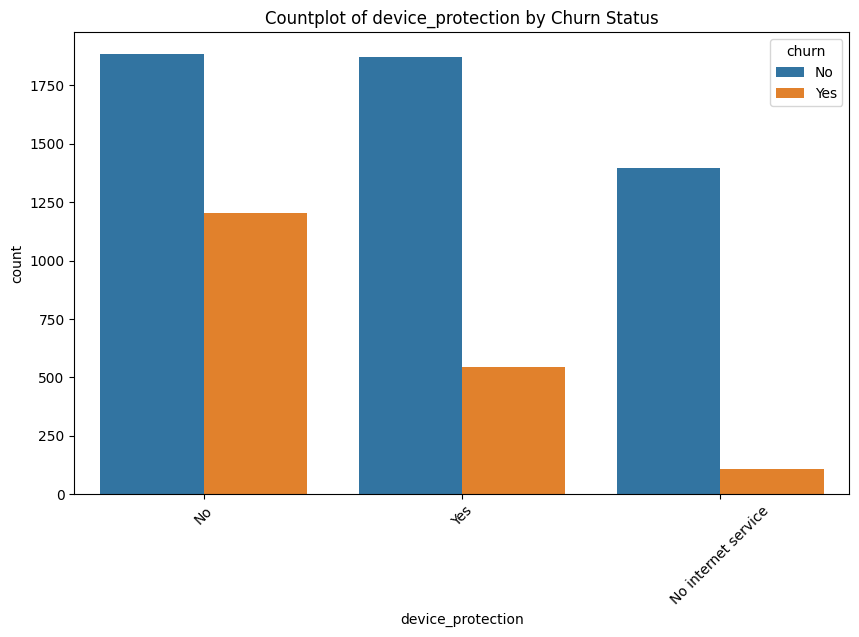

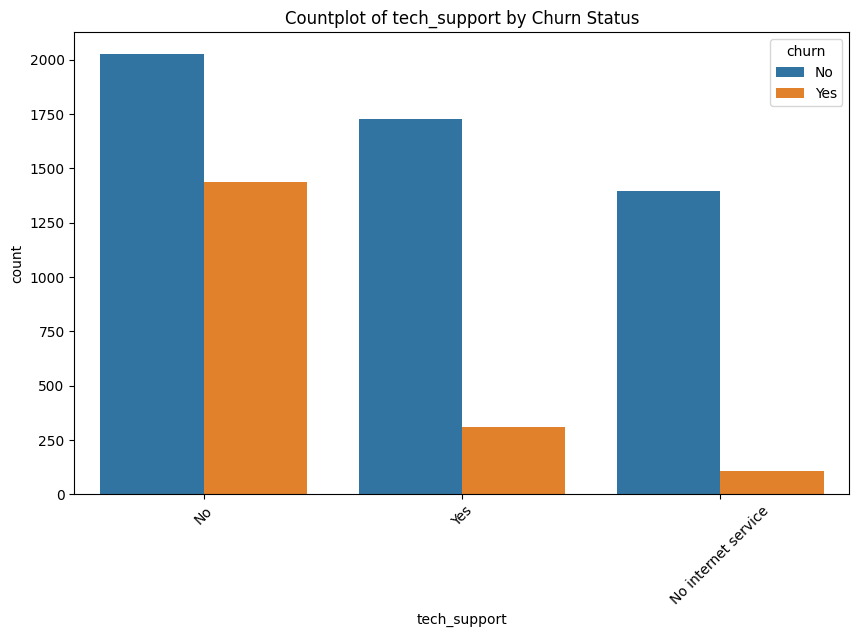

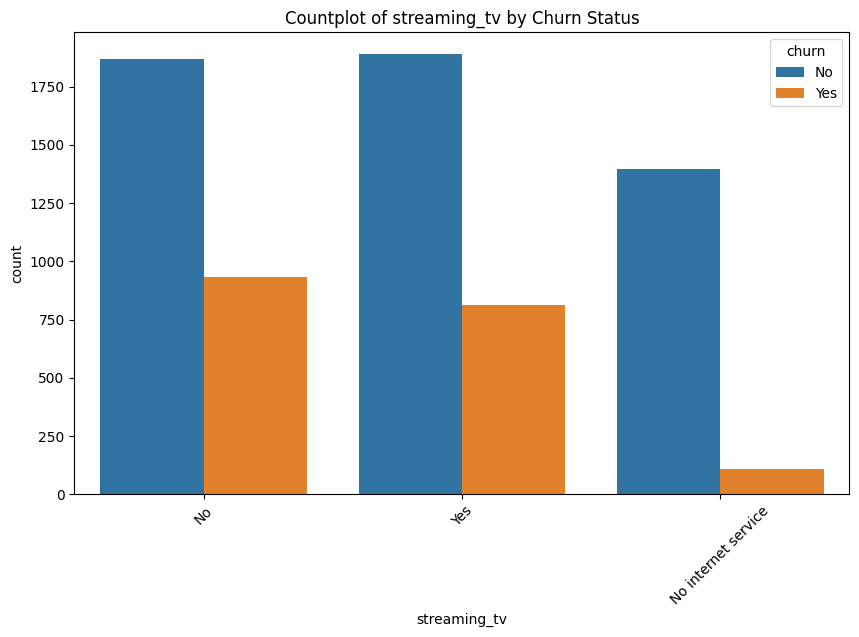

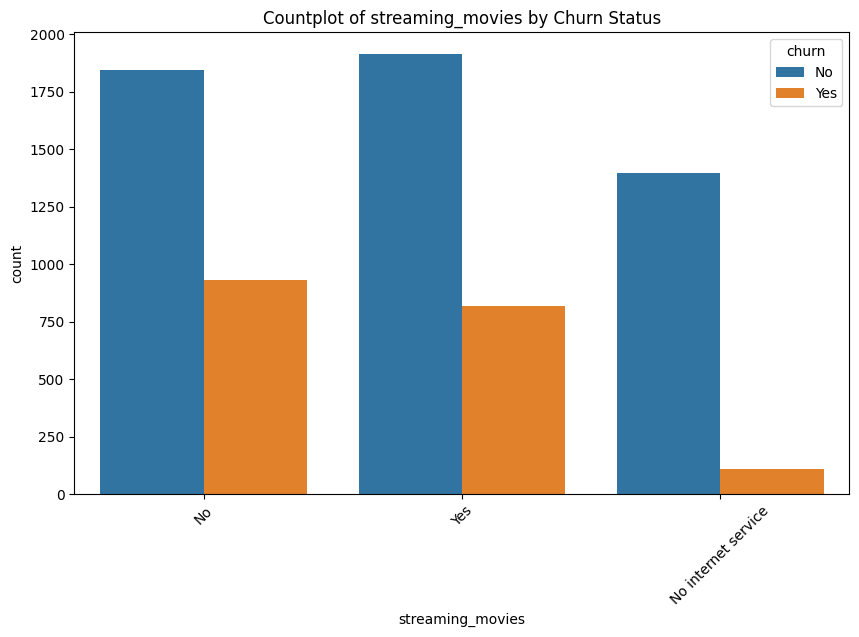

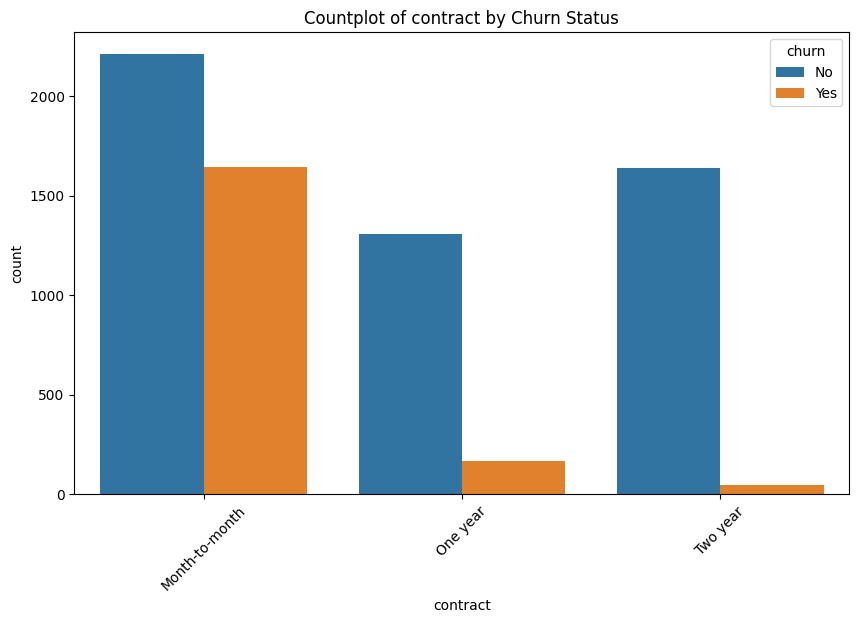

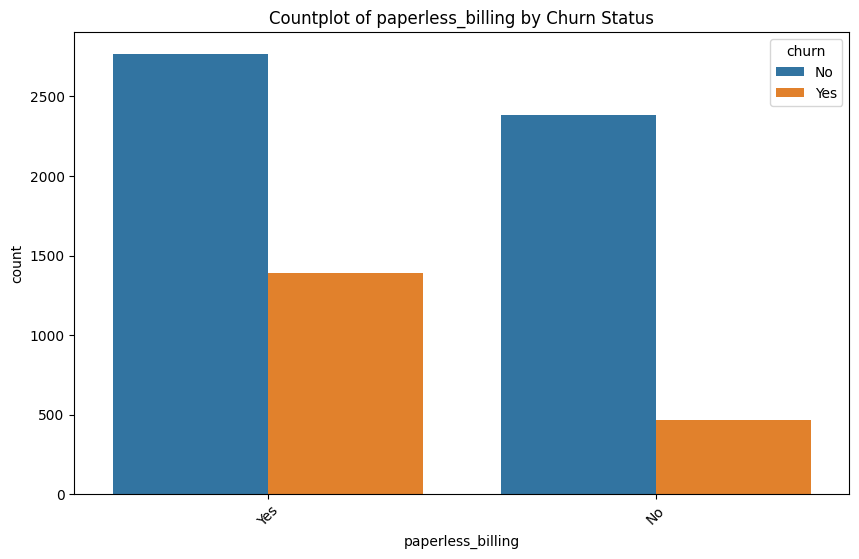

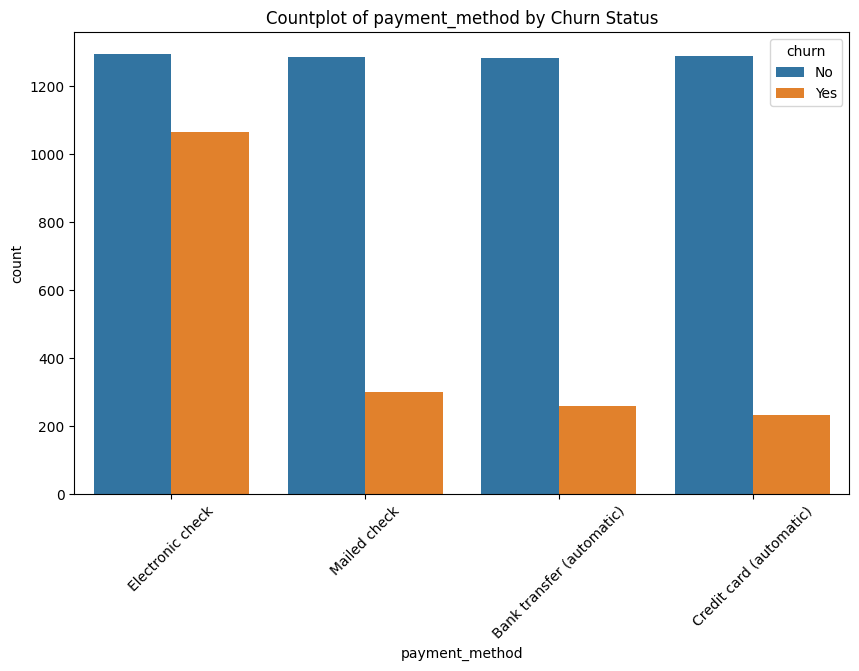

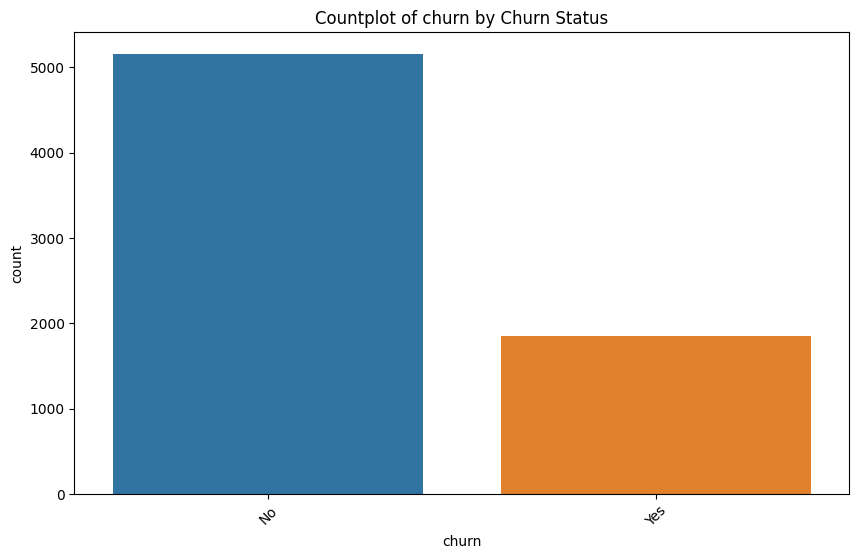

In [78]:
# Select categorical features
categorical_cols = telco_df.select_dtypes(include=['object']).columns

# Plot countplots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=telco_df, x=col, hue='churn')
    plt.title(f'Countplot of {col} by Churn Status')
    plt.xticks(rotation=45)
    plt.show()


## Save the data as a CSV file

In [80]:
telco_df.to_csv('churn_data.csv', index=False)